7. 거리두기 시기와 코로나 확진자 수가 관련있는가?  (시각화, pvalue)

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
import pandas as pd
from scipy import stats

import warnings
warnings.filterwarnings("ignore")  # 불필요한 Warning 메시지를 꺼줍니다.

%matplotlib inline

import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
# -깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] =False

In [72]:
with open('data/서울특별시 코로나19 자치구별 월별 확진자 발생동향(전체 합계)(최종).csv', mode="r", encoding='CP949') as file:
     df = pd.read_csv(file)

In [73]:
df.head(3)

,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,전체 합계
0,2022년 3월,26955,24391,39948,60090,70714,69378,76716,86479,55322,...,80998,47696,81957,78000,97142,76203,96021,128822,89107,1868123
1,2022년 2월,6310,5548,9872,15423,18404,16835,18563,21192,13579,...,18720,10535,18477,19719,23784,20096,26974,34449,25128,466825
2,2022년 1월,754,768,1424,1433,2017,1842,1780,2069,1110,...,2032,1059,1949,1973,2968,2374,3460,3388,2154,48129


In [74]:
#df = df.drop(['2022년 3월', '2022년 2월', '2022년 1월',])
# 2022년 삭제
df.drop(index = [0,1,2], inplace=True)

In [75]:
# '자치구 기준일' 리스트로 만들기
date=df['자치구 기준일'].values.tolist()

In [76]:
date

['2021년 12월',
 '2021년 11월',
 '2021년 10월',
 '2021년 9월',
 '2021년 8월',
 '2021년 7월',
 '2021년 6월',
 '2021년 5월',
 '2021년 4월',
 '2021년 3월',
 '2021년 2월',
 '2021년 1월',
 '2020년 12월',
 '2020년 11월',
 '2020년 10월',
 '2020년 9월',
 '2020년 8월',
 '2020년 7월',
 '2020년 6월',
 '2020년 5월',
 '2020년 4월',
 '2020년 3월',
 '2020년 2월']

In [36]:
#'전체 합계' 리스트로 만들기
sumall=df['전체 합계'].values.tolist()

In [37]:
sumall

[65000,
 32202,
 17809,
 20001,
 14205,
 13706,
 5737,
 5821,
 5482,
 3568,
 3647,
 4406,
 8726,
 2600,
 636,
 1248,
 2145,
 276,
 427,
 216,
 164,
 351,
 73]

In [38]:
# 2021년 날짜만 자르기
date_1 = date[:12]
date_1

['2021년 12월',
 '2021년 11월',
 '2021년 10월',
 '2021년 9월',
 '2021년 8월',
 '2021년 7월',
 '2021년 6월',
 '2021년 5월',
 '2021년 4월',
 '2021년 3월',
 '2021년 2월',
 '2021년 1월']

In [39]:
# 2020년 날짜만 자르기
date_2 = date[12:]
date_2

['2020년 12월',
 '2020년 11월',
 '2020년 10월',
 '2020년 9월',
 '2020년 8월',
 '2020년 7월',
 '2020년 6월',
 '2020년 5월',
 '2020년 4월',
 '2020년 3월',
 '2020년 2월']

In [42]:
# 2021년 확진자 수만 자르기
sumall_1 = sumall[:12]
sumall_1

[65000, 32202, 17809, 20001, 14205, 13706, 5737, 5821, 5482, 3568, 3647, 4406]

In [43]:
# 2020년 확진자 수만 자르기
sumall_2 = sumall[12:]
sumall_2

[8726, 2600, 636, 1248, 2145, 276, 427, 216, 164, 351, 73]

In [48]:
# 2020, 2021 그래프를 하나로 합치기 위해 '날짜'열 만들기
df['날짜'] = ['12월', '11월', '10월', '9월', '8월', '7월', '6월', '5월', '4월','3월', '2월', '1월', '12월', '11월', '10월', '9월', '8월', '7월', '6월', '5월', '4월','3월', '2월']

In [49]:
df

,자치구 기준일,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구,전체 합계,날짜
3,2021년 12월,1200,991,1478,1591,2072,3253,2863,3139,2259,...,1891,3059,2590,3271,2489,3323,4252,2919,65000,12월
4,2021년 11월,618,585,630,800,922,1584,1214,1698,1134,...,1137,1932,1381,1732,1048,1218,1947,1519,32202,11월
5,2021년 10월,509,359,433,454,514,1008,639,840,646,...,665,1019,671,805,480,935,1016,950,17809,10월
6,2021년 9월,401,539,412,587,877,917,668,746,555,...,586,1127,705,1062,659,1243,1678,866,20001,9월
7,2021년 8월,226,254,445,361,522,423,523,517,330,...,375,836,674,1009,668,1245,904,447,14205,8월
8,2021년 7월,198,196,478,485,467,377,418,489,354,...,317,648,726,1102,772,1276,830,522,13706,7월
9,2021년 6월,63,77,238,227,232,189,178,232,166,...,105,262,220,256,339,755,416,269,5737,6월
10,2021년 5월,78,83,166,169,208,243,277,261,254,...,144,248,220,235,269,518,445,319,5821,5월
11,2021년 4월,60,65,106,191,241,252,340,205,135,...,85,204,275,301,355,439,389,252,5482,4월
12,2021년 3월,63,79,131,139,253,114,188,137,122,...,25,127,172,123,158,222,191,249,3568,3월


In [50]:
# '날짜' 리스트로 만들기
date_2=df['날짜'].values.tolist()

In [54]:
# 2021년 확진자 수만 자르기
date_3 = date_2[:12]
date_3

['12월', '11월', '10월', '9월', '8월', '7월', '6월', '5월', '4월', '3월', '2월', '1월']

In [55]:
# 2020년 확진자 수만 자르기
date_4 = date_2[12:]
date_4

['12월', '11월', '10월', '9월', '8월', '7월', '6월', '5월', '4월', '3월', '2월']

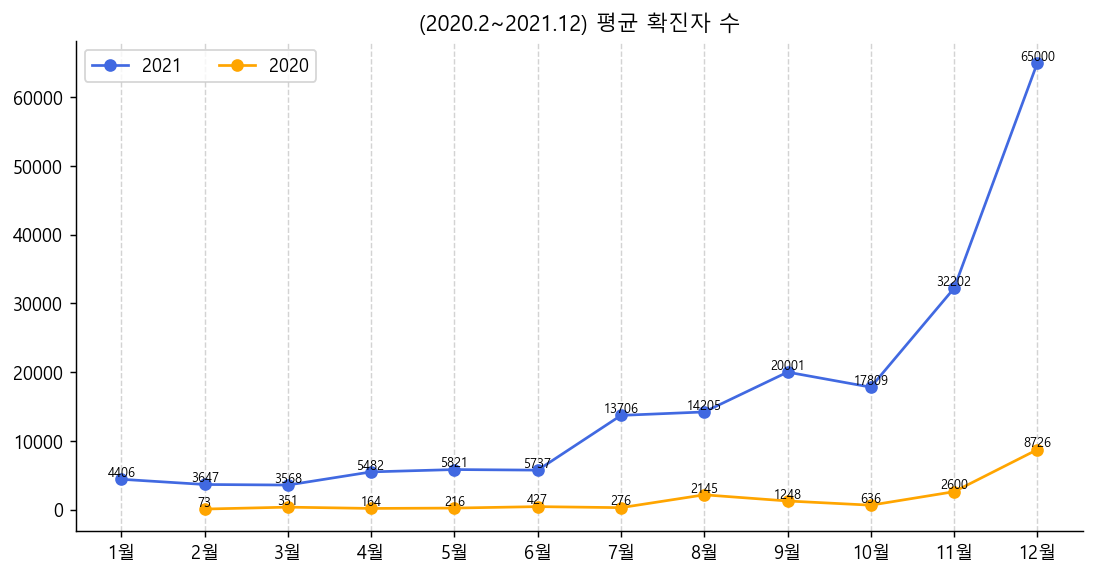

In [59]:
# 그래프를 그릴 도화지 준비하기
fig = plt.figure(figsize=(10,5), dpi=130)

ax = fig.add_subplot() # 그림 뼈대(프레임) 생성
 
ax.spines['right'].set_visible(False) # 오른쪽 축 숨김
ax.spines['top'].set_visible(False)

#세로 방향 그리드
plt.grid(True, axis='x', linestyle='--', color='lightgrey')

# x축에 년도, y축에 인구수가 있는 선 그래프 만들기, css 색상 지정
plt.plot(date_3, sumall_1, color='royalblue', marker='o', linestyle='solid',label='2021')
plt.plot(date_4, sumall_2, color='orange', marker='o', linestyle='solid', label='2020')

# 2021 숫자 넣는 부분, height + 0.25로 숫자 약간 위로 위치하게 조정, %i : 수치 int,  va : 수치의 높낮이
for i in range(len(date_3)):
    height = sumall_1[i]
    plt.text(date_3[i], height+ 0.25, '%i' %height, ha='center', va='bottom', size = 7)
    
# 2020 숫자 넣는 부분
for i in range(len(date_4)):
    height = sumall_2[i]
    plt.text(date_4[i], height+ 0.25, '%i' %height, ha='center', va='bottom', size = 7)
    
# 범례 세로 방향으로
#plt.legend(loc='best')   
# 범례 가로 방향으로
plt.legend(loc='best', ncol=2)

# 좌우 반전
plt.gca().invert_xaxis()

# 제목 더하기
plt.title("(2020.2~2021.12) 평균 확진자 수")

plt.show()

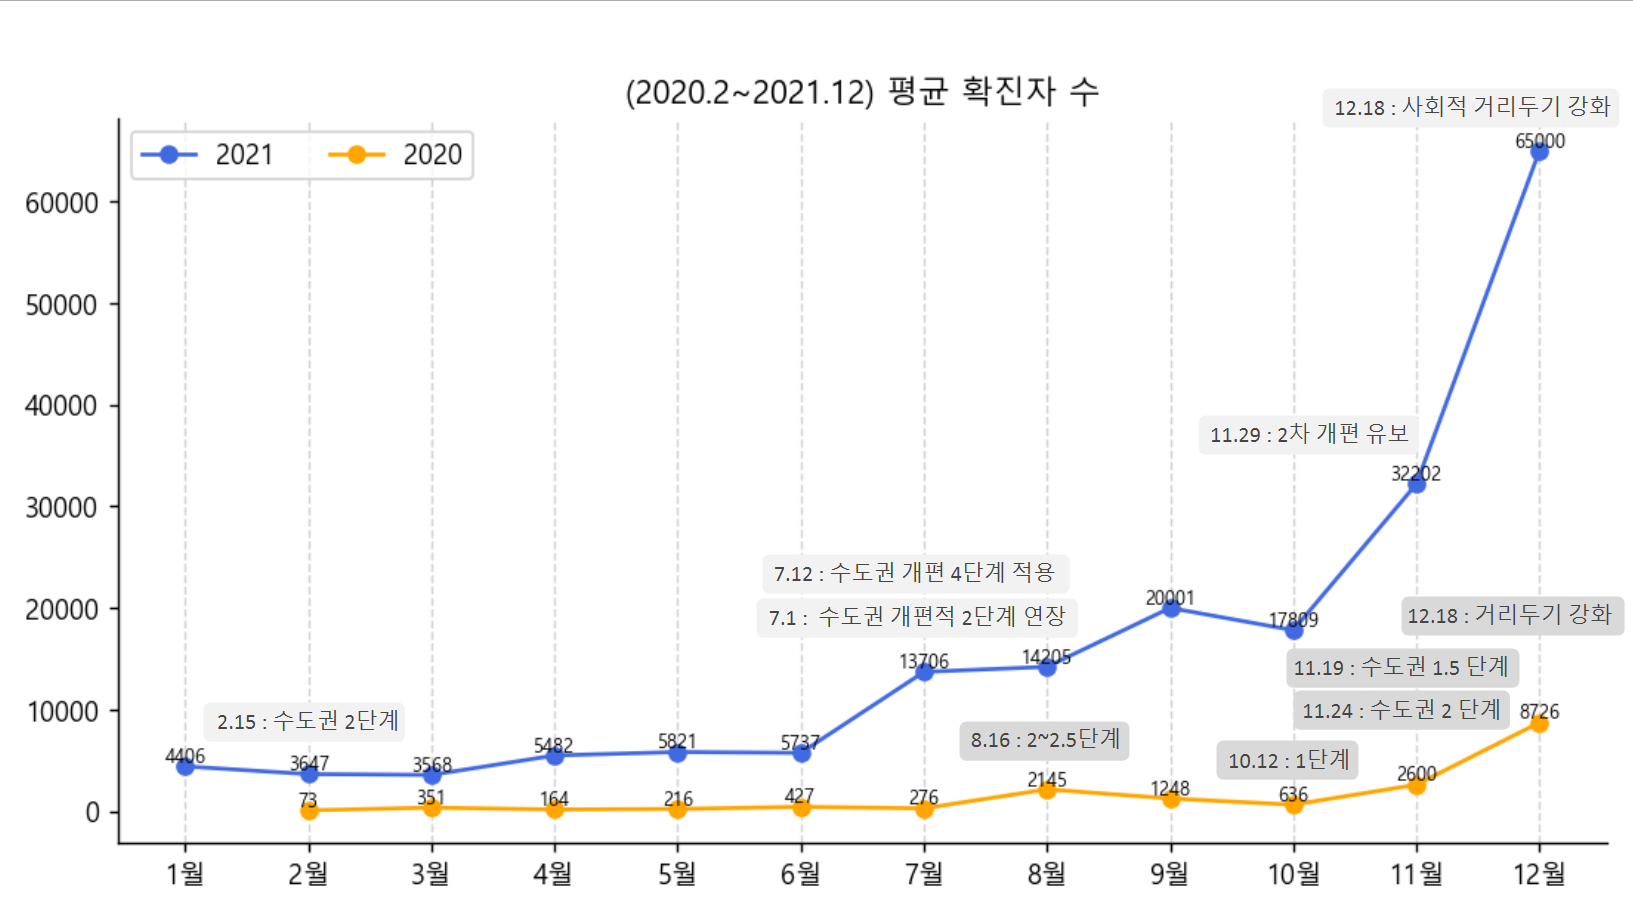

4단계가 효과 있었는지 검정

- 2월 15일 수도권 2단계
- 7월 12일 수도권 4단계
____________________________________
- 7월 12일 수도권 4단계
- 11월 1일 단계적 일상회복

-------------------------

<대응 표본 t-test>

- 하나의 동일 집단으로부터 두 개의 수치 차이를 비교
- 독립변수가 없음
- 양적인 종속 변수가 두 개 (모두 같은 집단의 값)
- 두 집단의 표본이 1대1 대응하는 경우 사용된다. 즉 6학년 애들이 4월에 중간고사를 한번 치르고 이후 전부 인터넷 강의로 대체한 이후, 기말고사를 치르게 되면 A(중간고사)점수 = B(기말고사)점수 1대1로 대응된다. 이런 경우의 평균의 차이가 유의미한지 (성적이 올랐는지, 떨어졌는지) 대응표본 T검정으로 살펴볼 수 있다. 

In [85]:
web_7 = pd.DataFrame({'7월':[198,196,478,485,467,377,418,489,354,373,562,539,405,641,408,569,554,317,648,726,1102,772,1276,830,522]})               
web_11 = pd.DataFrame({'11월':[618,585,630,800,922,1584,1214,1698,1134,1048,1570,1520,902,969,1426,1733,1935,1137,1932,1381,1732,1048,1218,1947,1519]})
 
t_result=stats.ttest_rel(web_7, web_11) 

t_result

Ttest_relResult(statistic=array([-9.43565076]), pvalue=array([1.50966317e-09]))

1.50966317e-09 => 0.000000002

In [84]:
web_2 = pd.DataFrame({'2월':[42,88,235,119,153,178,167,208,123,140,185,154,98,101,138,99,237,71,172,150,186,111,124,210,158]})                 
web_7 = pd.DataFrame({'7월':[198,196,478,485,467,377,418,489,354,373,562,539,405,641,408,569,554,317,648,726,1102,772,1276,830,522]})               

t_result=stats.ttest_rel(web_2, web_7)
t_result

Ttest_relResult(statistic=array([-8.39340028]), pvalue=array([1.3353695e-08]))

1.3353695e-08 => 0.00000001

1) 귀무가설 : (7월-11월) 사회적 거리두기 4단계가 효과가 있다.

위 결과를 보았을 때 p-value가  0.000000002(<0.05)이므로, 사회적 거리두기 4단계가 통계적으로 유의미한 연관성이 있다는 
전제 하에, 이러한 확진자수 평균 합계 측정 결과가 나올 확률이 0.000000002%라고 이해할 수 있다.


2) 귀무가설 : (2월-7월) 사회적 거리두기 4단계가 효과가 있다.

위 결과를 보았을 때 p-value가  0.00000001(<0.05)이므로, 사회적 거리두기 4단계가 통계적으로 유의미한 연관성이 있다는 
전제 하에, 이러한 확진자수 평균 합계 측정 결과가 나올 확률이 0.00000001%라고 이해할 수 있다.



=> 사회적 거리두기 4단계는 통계적으로 유의미한 차이가 없다.